# Statistics for Artificial Intelligence and Data Science, Coursework 2

**Table of Contents**

1. Section 1: Introduction
  * Section 1.1: Outline
  * Section 1.2: Loading the Data
2. Section 2: Data Preparation
  * Section 2.1: Historic Bridges
  * Section 2.2: Design and Material
  * Section 2.3: Current Condition Rating
3. Section 3: Exploratory Analysis
  * Section 3.1: Assigning the Variables to a New Dataframe
  * Section 3.2: Relationships Between Categorical and Continuous Variables
  * Section 3.2: Relationship Between Categorical Variables
  * Section 3.4: Relationships Between Continuous Variables
  * Section 3.5: Preliminary Conclusions
4. Section 4: Regression Modelling
  * Section 4.1: Coefficient of Determination
  * Section 4.2: Distribution of Residuals
  * Section 4.3: Influence of Predictors
  * Section 4.4: Final Conclusions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Section 1: Introduction
This notebook presents an analysis of the Texas Bridge data from the Texas Department of Transportation. The aim of the analysis is to investigate the efficacy of five variables in predicting the current condition of a given bridge. Those five predictor variables are age, average use, percentage of trucks, material and design.

### Section 1.1: Outline
Section 2 prepares the data by creating new variables according to the specifications. A new variable, Current Condition, is also created. Section 3 explores the various relationships between the predictor variables and the target variable, namely a bridge's condition. Some preliminary conclusions are made based on these relationships. Section 4 constructs a linear regression. The coefficient of determination, distribution of residuals/errors and the various influneces of the predictors are subsequently analysed. Finally, some conclusions are made.

### Section 1.2: Loading the Data
The data is loaded from a CSV file. The bridges' Structure IDs are used as an index. 

In [3]:
bridges = pd.read_csv('tx19_bridges_sample.csv', index_col = 'Structure_id')
bridges

,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,AverageDaily,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
Structure_id,,,,,,,,,,,,,,,,,,,,,
000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,1,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,100,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,80,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,150,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,300,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,300,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,1200,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500


## Section 2: Data Preparation
In this section, new variables are created according to the report's specifications. The target variable, Current Condition, is also created.

### Section 2.1: Historic Bridges
Very old bridges are excluded. In this case, very old bridges are defined as those built before 1964 because this year represents the highest value in the lower quartile.

In [4]:
bridges['Year'].describe()

count    34293.000000
mean      1981.497419
std         23.860135
min       1900.000000
25%       1964.000000
50%       1985.000000
75%       2002.000000
max       2019.000000
Name: Year, dtype: float64

In [5]:
bridges = bridges.loc[bridges['Year'] > 1964]

### Section 2.2: Design and Material
* All categories that account for a lower proportion than Other in the Design and Material predictor variables are merged into the Other category.
* So for Design, Arch, Frame, Truss, Movable and Suspension are merged into Other. And for Material, Masonry is merged into Other.
* Thus the number of categories in both Design and Material is reduced by merging some of the very small categories.

In [6]:
bridges['Design'].value_counts(normalize=True) * 100

Beam          88.720283
Slab           6.108712
Other          4.606825
Arch           0.311272
Frame          0.140072
Truss          0.073927
Movable        0.027236
Suspension     0.011673
Name: Design, dtype: float64

In [7]:
bridges['Material'].value_counts(normalize=True) * 100

Concrete    80.954048
Steel       17.368974
Timber       1.521342
Other        0.151745
Masonry      0.003891
Name: Material, dtype: float64

In [8]:
bridges['Design'] = bridges['Design'].replace({'Arch':'Other','Frame':'Other','Truss':'Other','Movable':'Other','Suspension':'Other'})
# is there a more efficient way?

/tmp/ipykernel_194/1711014058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bridges['Design'] = bridges['Design'].replace({'Arch':'Other','Frame':'Other','Truss':'Other','Movable':'Other','Suspension':'Other'})


In [9]:
bridges['Material'] = bridges['Material'].replace({'Masonry': 'Other'})

/tmp/ipykernel_194/765044152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bridges['Material'] = bridges['Material'].replace({'Masonry': 'Other'})


### Section 2.3: Current Condition Rating
* A bridge's condition rating is derived from the ratings of the three main condition variables, namely Deck, Superstructure and Substructure.
* The ratings are converted into numbers so that an overall numerical rating can be calculated.

In [10]:
ratings = ['Failed', 'Failing', 'Critical', 'Serious', 'Poor', 'Fair',
'Satisfactory', 'Good', 'Very Good', 'Excellent']
scores = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

bridges['Deck_rating'] = bridges['Deck_rating'].replace(ratings, scores)
bridges['Superstr_rating'] = bridges['Superstr_rating'].replace(ratings, scores)
bridges['Substr_rating'] = bridges['Substr_rating'].replace(ratings, scores)

current_condition = bridges.Deck_rating + bridges.Superstr_rating + bridges.Substr_rating
bridges['ConditionRating'] = current_condition
# convert to integers

/tmp/ipykernel_194/3259092872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bridges['Deck_rating'] = bridges['Deck_rating'].replace(ratings, scores)
/tmp/ipykernel_194/3259092872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bridges['Superstr_rating'] = bridges['Superstr_rating'].replace(ratings, scores)
/tmp/ipykernel_194/3259092872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

## Section 3: Exploratory Analysis
In this section, the predictor variables are assigned to a new dataframe. The various relationships between the five predictor variables and the target variable - Current Condition - are then analysed. Some preliminary conclusions are made based on this analysis.
### Section 3.1: Assigning the Variables to a New Dataframe
* The predictor variables and the target variable are assigned to a new dataframe.
* The bridges' ages are assigned to a new variable - Age - which is derived from the Year variable from the previous dataframe.
* The table below gives an overview of the data that is going to be analysed.

In [11]:
variables = pd.DataFrame().assign(Age = 2021 - bridges.Year, AverageDaily = bridges.AverageDaily, TrucksPercent = bridges.Trucks_percent, Material = bridges.Material, Design=bridges.Design, ConditionRating=bridges.ConditionRating)
variables

,Age,AverageDaily,TrucksPercent,Material,Design,ConditionRating
Structure_id,,,,,,
000021521-00101,16,1,0.0,Concrete,Slab,23.0
000021521-00181,16,1,0.0,Concrete,Slab,22.0
000021521-TMP20,9,100,0.0,Concrete,Beam,24.0
000021580-00092,17,150,4.0,Concrete,Beam,23.0
000021580-00093,16,150,4.0,Concrete,Beam,24.0
...,...,...,...,...,...,...
DAPFORHOO000012,27,300,40.0,Concrete,Beam,21.0
DAPFORHOO000013,21,300,40.0,Concrete,Beam,21.0
DAPFORHOO000015,25,1200,25.0,Concrete,Beam,21.0


### Section 3.2: Relationships Between Categorical and Continuous Variables
* The relationships between Material and Design - categorical variables - and Condition Rating - a continuous variable - are visualised using boxplots.
* The relationships between Material and Design and Age, Average Use and Percentage of Trucks - all continuous variables - are also visualised using boxplots.
* To show the relationships between Average Use and Material and Design, logarithmic values are used for Average Use because the absolute values give a skewed representation of the data.

Text(0, 0.5, 'ConditionRating')

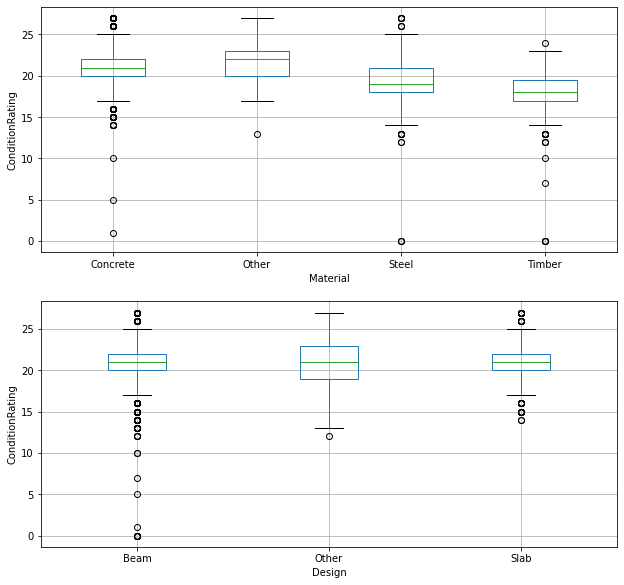

In [12]:
fig, (a1, a2) = plt.subplots(2,1, figsize=(10,10))

variables.boxplot(column='ConditionRating', by='Material', ax=a1)
variables.boxplot(column='ConditionRating', by='Design', ax=a2)

fig.suptitle('')
[a.set_title('') for a in [a1, a2]]
a1.set_ylabel('ConditionRating')
a2.set_ylabel('ConditionRating')

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'TrucksPercent')

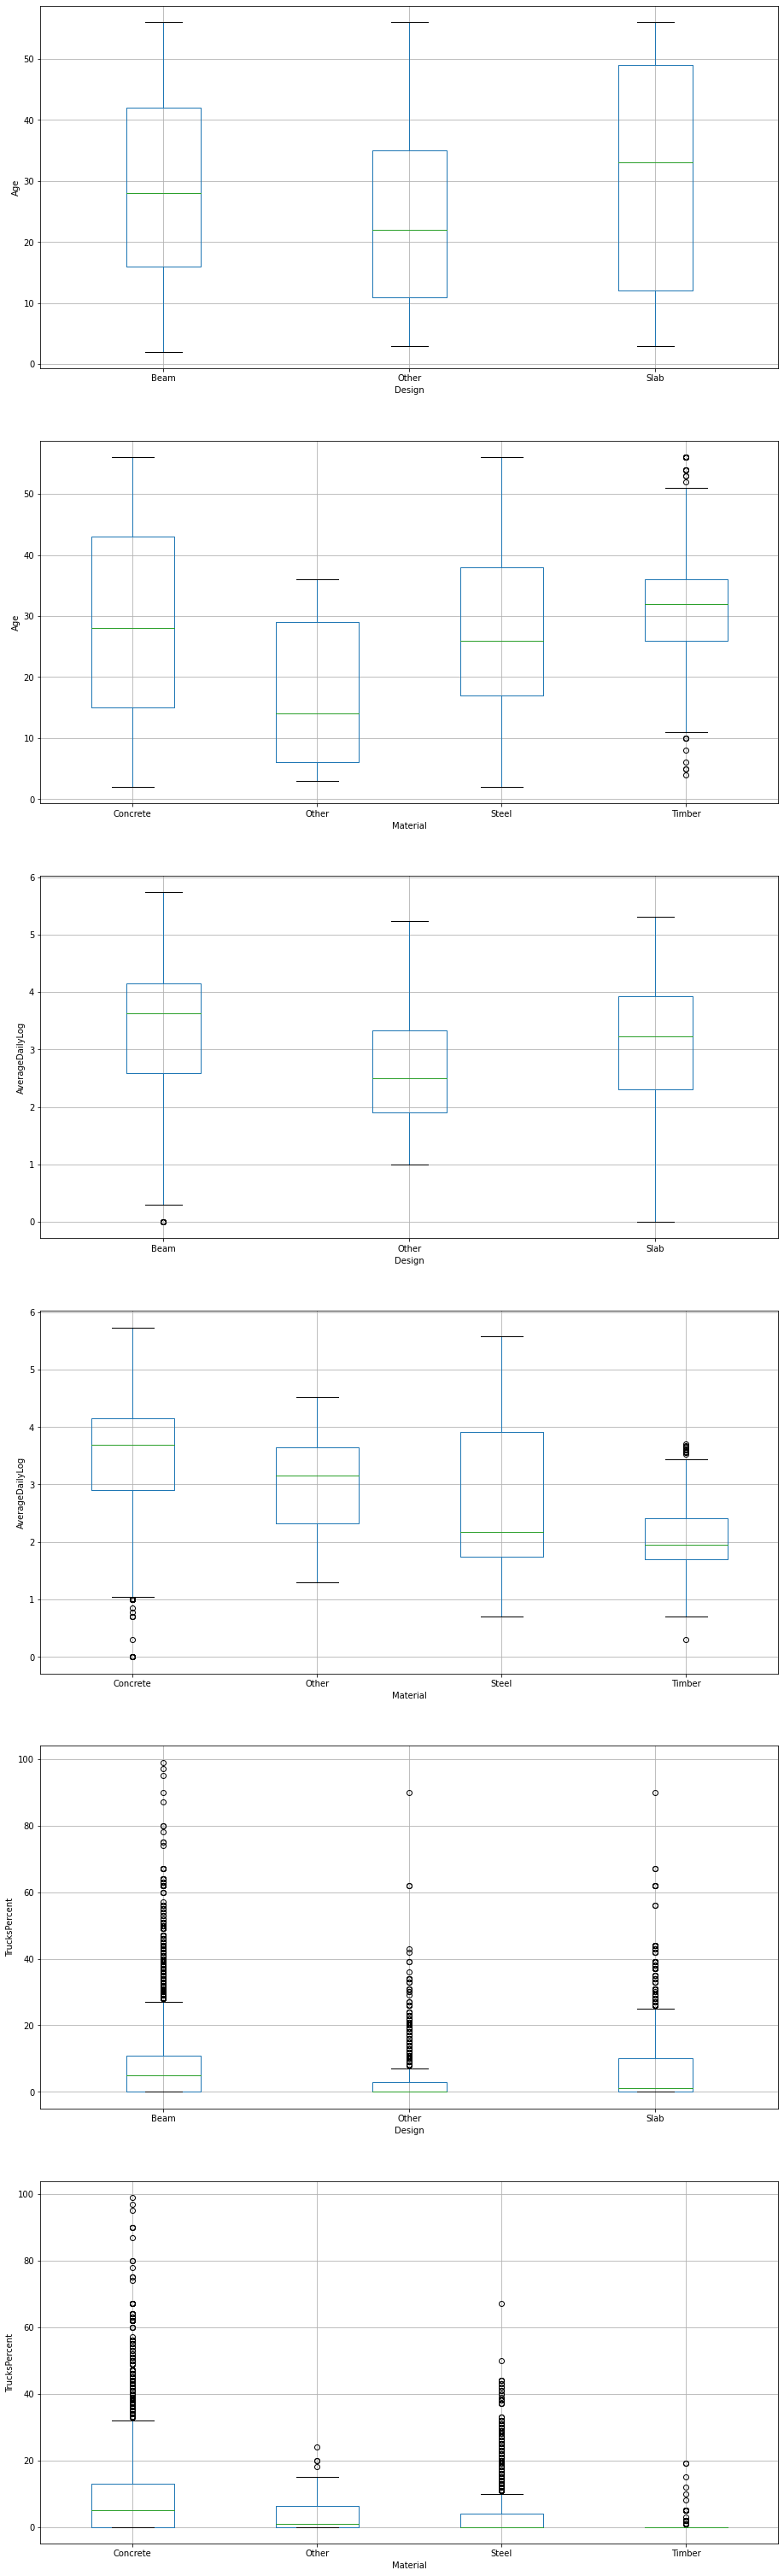

In [13]:
logs = variables.assign(AverageDailyLog = np.log10(variables.AverageDaily))

fig, (a1,a2,a3,a4,a5,a6) = plt.subplots(6,1, figsize=(15,55))

variables.boxplot(column='Age', by='Design', ax=a1)
variables.boxplot(column='Age', by='Material', ax=a2)
logs.boxplot(column='AverageDailyLog', by='Design', ax=a3)
logs.boxplot(column='AverageDailyLog', by='Material', ax=a4)
variables.boxplot(column='TrucksPercent', by='Design', ax=a5)
variables.boxplot(column='TrucksPercent', by='Material', ax=a6)

fig.suptitle('')
[a.set_title('') for a in [a1,a2,a3,a4,a5,a6]]
a1.set_ylabel('Age')
a2.set_ylabel('Age')
a3.set_ylabel('AverageDailyLog')
a4.set_ylabel('AverageDailyLog')
a5.set_ylabel('TrucksPercent')
a6.set_ylabel('TrucksPercent')

### Section 3.2: Relationship Between Categorical Variables
The simple cross tabulation below shows the relationship between the predictors Material and Design.

In [14]:
design_material_total = pd.crosstab(variables.Design, [variables.Material], normalize='all', margins=True)
design_material_total.round(4) * 100

Material,Concrete,Other,Steel,Timber,All
Design,,,,,
Beam,71.06,0.00,16.14,1.52,88.72
Other,3.79,0.16,1.23,0.00,5.17
Slab,6.11,0.00,0.00,0.00,6.11
All,80.95,0.16,17.37,1.52,100.00


### Section 3.4: Relationships Between Continuous Variables
The heatmap below gives a visualtion of the relationships between the predictors Age, Average Usage and Percentage of Trucks and the target variable - Condition Rating.

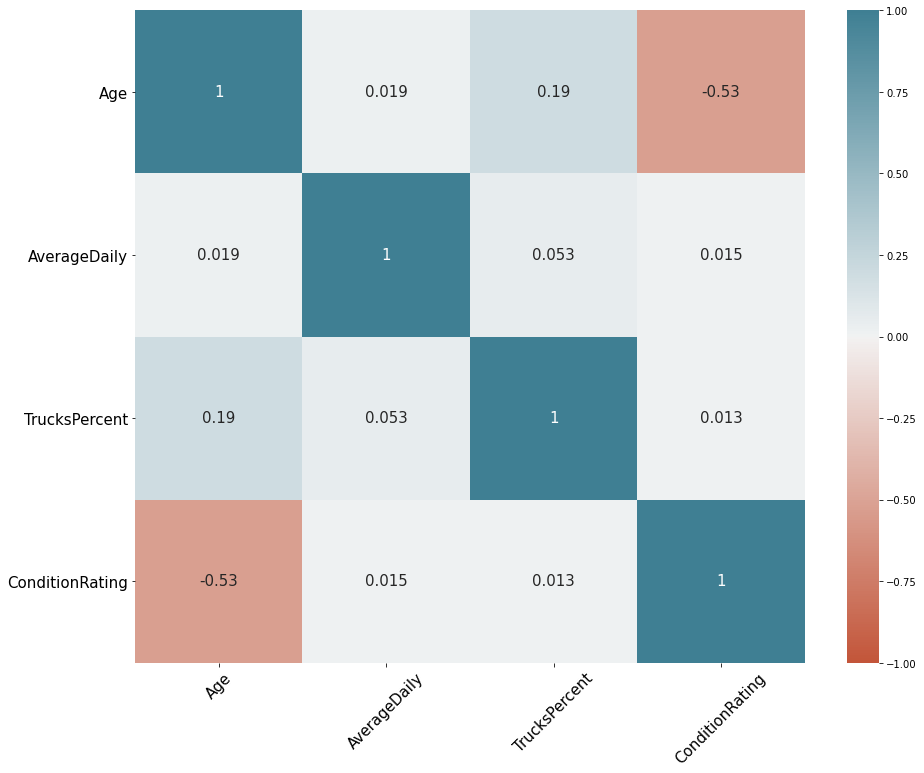

In [15]:
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(variables.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

### Section 3.5: Preliminary Conclusions
* For each Design category, the median Condition value is the same. While for each Material category, there is greater variety. This shows that the effect of Material on Condition has greater variety than that of Design.
* The heatmap gives a clear representation of the relationships between Condition and Age, Average Usage and Percentage of Trucks.
* Condition and Age have a relatively high negative correlation, meaning that the older a bridge is the worse its Condition will be.
* Condition and both Average Usage and Percentage of Trucks have a very low positive correlation, meaning that for every increase in Average Usage and Percentage of Trucks there will be a very small increase in Condition.
* The positive correlation between Condition and Average Usage is fractionally higher than that of Condition and Percentage of Trucks, this means that Average Usage is a fractionally better predictor of Condition than Percentage of Trucks.
* It can be concluded, however, that of the continuous/numerical variables, Age has the greatest influence on Condition because it has the highest level of (negative) correlation with Condition.

## Section 4: Regression Modelling
In this section, a linear regression will be carried out to get the coefficient of determination, distribution of residuals and the various influences of the predictors are subsequently analysed. Finally, some conclusions are made.

### Section 4.1: Coefficient of Determination
Histograms and scatter plots are used to visualise the distributions of the numerical predictors. The coefficients of determination for all the predictors are then given.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

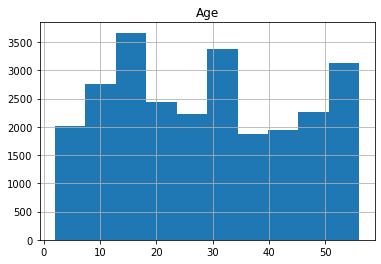

In [16]:
variables.hist(column='Age')

array([[<AxesSubplot:title={'center':'AverageDaily'}>]], dtype=object)

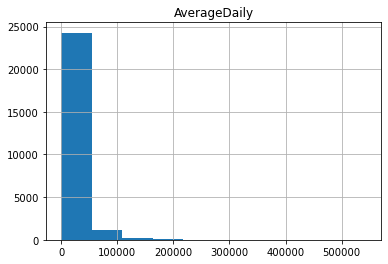

In [17]:
variables.hist(column='AverageDaily')

array([[<AxesSubplot:title={'center':'TrucksPercent'}>]], dtype=object)

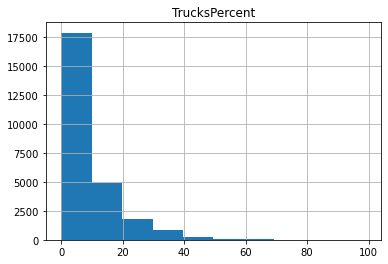

In [18]:
variables.hist(column='TrucksPercent')

* The above histograms for Average Usage and Percentage of Trucks show a highly positive skew, meaning that the mean and median values will be greater than the mode.
* For the purposes of generating a better fit for the regression line, outliers that are more than double the means of Average Usage and Percentage of Trucks are excluded from further analysis.

In [19]:
variables['AverageDaily'].describe()

count     25701.000000
mean      12446.977394
std       24918.665522
min           0.000000
25%         300.000000
50%        3800.000000
75%       13300.000000
max      543000.000000
Name: AverageDaily, dtype: float64

In [20]:
variables['TrucksPercent'].describe()

count    25701.000000
mean         7.523559
std          9.900255
min          0.000000
25%          0.000000
50%          4.000000
75%         11.000000
max         99.000000
Name: TrucksPercent, dtype: float64

<AxesSubplot:xlabel='ConditionRating', ylabel='TrucksPercent'>

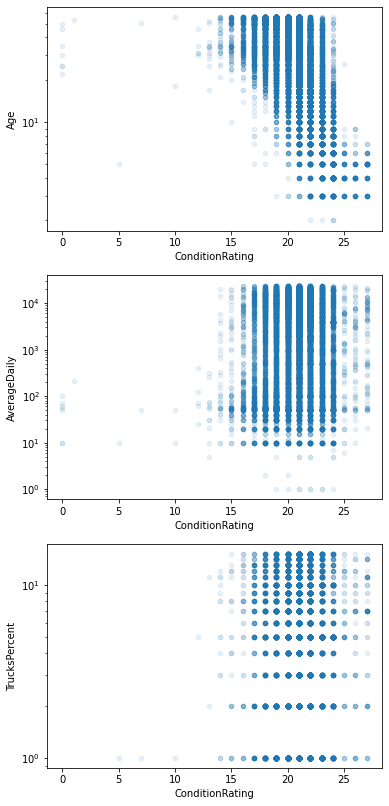

In [21]:
fig, (a1,a2,a3) = plt.subplots(3, 1, figsize=(6,14))
variables.plot(kind='scatter',  x='ConditionRating', y='Age', ax=a1, logy=True, alpha=0.1)
variables.loc[variables.AverageDaily < 24000].plot(kind='scatter',  x='ConditionRating', y='AverageDaily', ax=a2, logy=True, alpha=0.1)
variables.loc[variables.TrucksPercent < 16].plot(kind='scatter',  x='ConditionRating', y='TrucksPercent', ax=a3, logy=True, alpha=0.1)

The above scatter plots show a degree of co-linearity, or correlation, however it is not significant enough for there to be an issue when running the regression.

In [36]:
variables['ConditionRating'].isna().sum()

0

In [37]:
variables = variables.dropna()

**Note**: an insignificant number of five bridges have a Condition Rating of not a number (NaN). These are removed so that a regression can be performed.

In [40]:
y = variables.ConditionRating
X = np.column_stack((variables.Age, variables.AverageDaily < 24000, variables.TrucksPercent < 16))

reg = LinearRegression().fit(X, y)

reg.score(X, y)

0.28580442721190347

In [97]:
design = pd.get_dummies(variables.Design, drop_first=False)

In [96]:
material = pd.get_dummies(variables.Material, drop_first=False)

In [65]:
X2 = np.column_stack((variables.Age,variables.AverageDaily,variables.TrucksPercent, design.Beam, design.Other, design.Slab, material.Concrete, material.Timber, material.Steel, material.Other))
reg2 = LinearRegression().fit(X2, y)
reg2.score(X2, y)

0.4374785967588166

* When only accounting for the three numerical predictors, the coefficient of determination is equal to 0.286, meaning that 28.6% of the variation of a bridge's Condition Rating can be explained by the predictors.
* When, however, the two categorical predictors - Material and Design - are also included, the coefficient of determination increases by 15.1 percentage points to 43.7%. This means that, together, the predictors give a higher accuracy prediction of the bridges' Conditions; with 100% representing a complete correlation between the variation of the predictors and a bridge's Condition. 
* If these figures are broken down, it can be concluded that, on average the three numerical predictors have a slightly greater influence on a bridge's condition than that of the two categorical predictors. On average, each of the numerical predictors account for 9.53 percentage points of the coefficient of determination, while for Design and Material the figure stands at 7.56 percentage points.

### Section 4.2: Distribution of Residuals
A histogram is plotted to show the error in prediction.

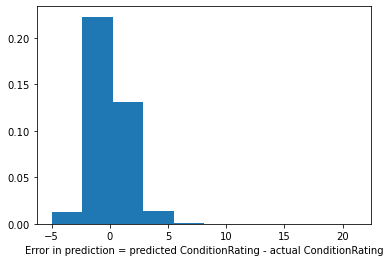

In [41]:
y_hat = reg.predict(X)

fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction = predicted ConditionRating - actual ConditionRating')

* The above histogram shows that the prediction error of the numerical predictors - Age, Average Usage and Percentage of Trucks - is relatively low. 
* Most of the error values are clustered around zero - the closer they are to zero the lower their prediction error, or, the more accurate the predictors are at predicting a bridge's Condition.

Text(0, 0.5, 'Actual Value')

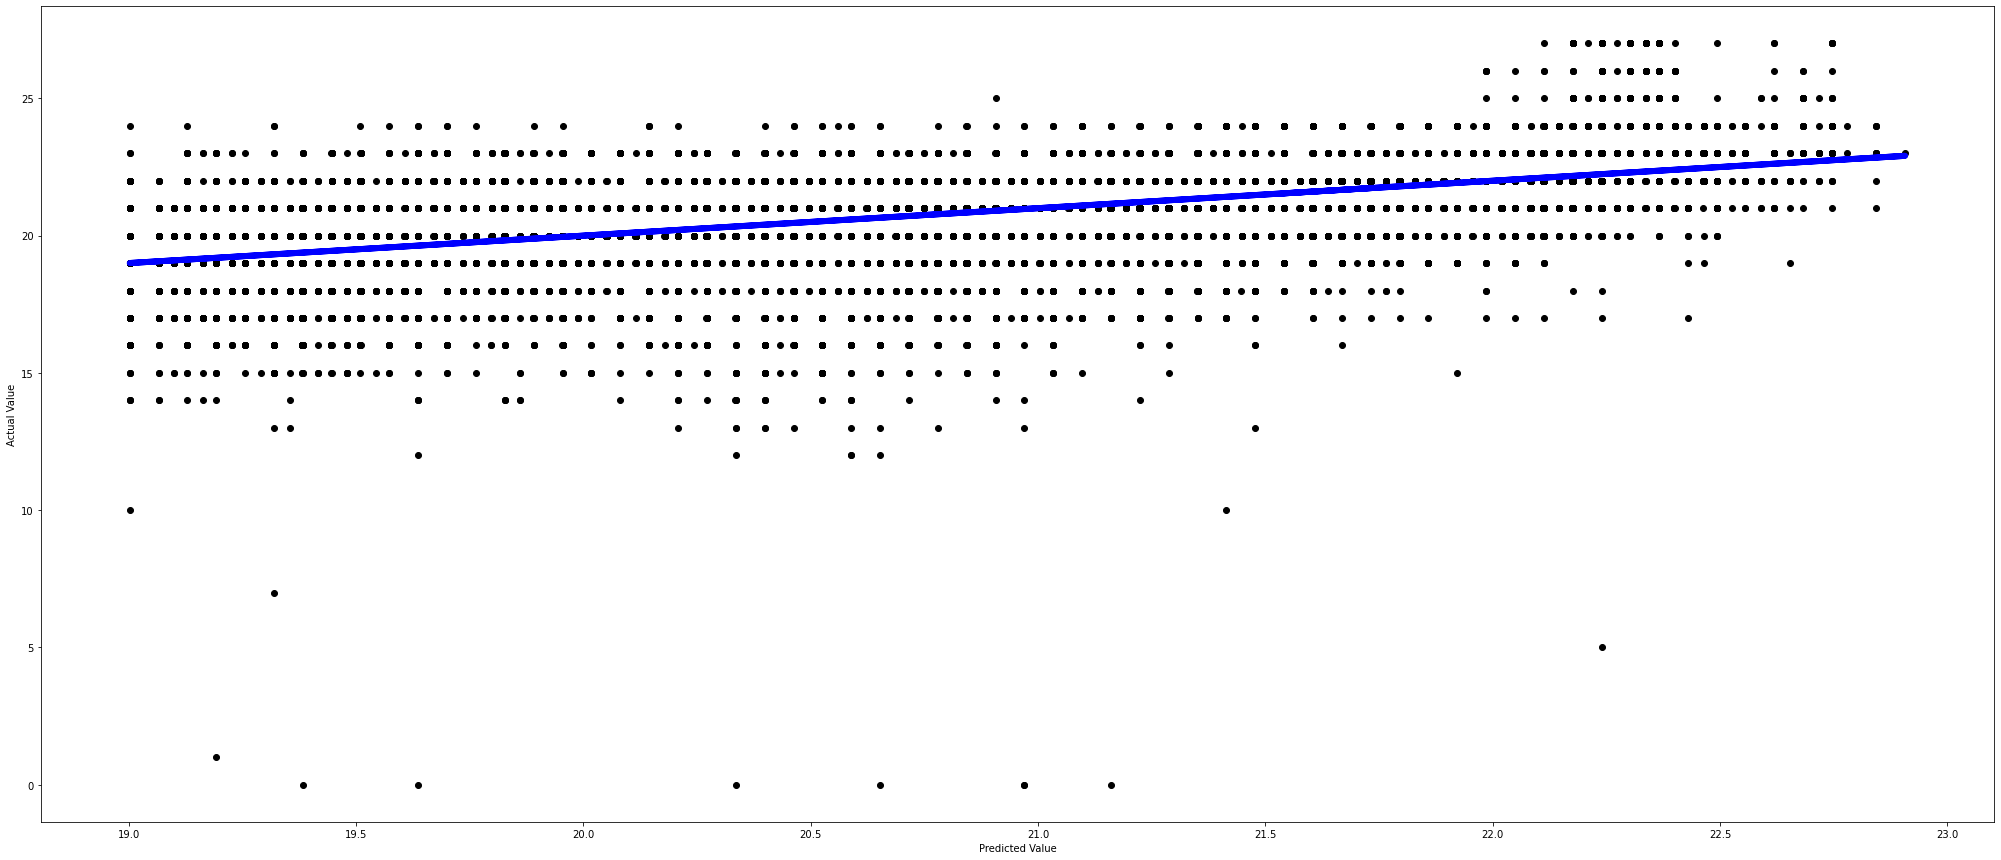

In [81]:
fig, a = plt.subplots(1,1,figsize=(35,15))
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=6)

two_std = residuals.std() * 2

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

The above shows a scatter plot of the actual values against the predicted values. A regression of better fit, i.e. more accurate predictors, would see the points closer to the blue line.

### Section 4.3: Influence of Predictors

In [86]:
beta_Age, beta_AverageDaily, beta_TrucksPercent = reg.coef_
print('Estimated regression coefficient for Age is a %4.2f' % beta_Age, 'change of rating points per year.')
print('Estimated regression coefficient for AverageDaily is a %4.6f' % beta_AverageDaily, 'change of rating points per vehicle.')
print('Estimated regression coefficient for TrucksPercent is a %4.2f' % beta_TrucksPercent, 'change of rating points per percentage point.')

Estimated regression coefficient for Age is a -0.06 change of rating points per year.
Estimated regression coefficient for AverageDaily is a -0.097529 change of rating points per vehicle.
Estimated regression coefficient for TrucksPercent is a -0.38 change of rating points per percentage point.


All three numerical predictors have a negative estimated regression coefficient, meaning that as they are increased the target variable decreases.

In [94]:
#Age_range = variables.Age.quantile(0.9) - variables.Age.quantile(0.1)
#AverageDaily_range = variables.AverageDaily.quantile(0.9) - variables.AverageDaily.quantile(0.1)
#TrucksPercent_range = variables.TrucksPercent.quantile(0.9) - variables.TrucksPercent.quantile(0.1)
#ConditionRating_range = variables.ConditionRating.quantile(0.9) - variables.ConditionRating.quantile(0.1)

In [93]:
#print ('The change in ConditionRating (as a percentage of its range) given by the Age coefficient (over its range) is %4.1f percent.' % (100 * (beta_Age * Age_range) / ConditionRating_range))
#print ('The change in ConditionRating (as a percentage of its range) given by the AverageDaily coefficient (over its range) is %4.1f percent.' % (100 * (beta_AverageDaily * AverageDaily_range) / ConditionRating_range))
#print ('The change in ConditionRating (as a percentage of its range) given by the TrucksPercent coefficient (over its range) is %4.1f percent.' % (100 * (beta_TrucksPercent * TrucksPercent_range) / ConditionRating_range))

In [99]:
Z = StandardScaler().fit_transform(X)

reg1 = LinearRegression().fit(Z, y)
beta_AgeT, beta_AverageDailyT, beta_TrucksPercentT = reg1.coef_
print('Estimated regression coefficient for standardised Age is %4.2f' % beta_AgeT)
print('Estimated regression coefficient for standardised AverageDaily is %4.2f' % beta_AverageDailyT)
print('Estimated regression coefficient for standardised TrucksPercent is %4.2f' % beta_TrucksPercentT)

Estimated regression coefficient for standardised Age is -0.99
Estimated regression coefficient for standardised AverageDaily is -0.03
Estimated regression coefficient for standardised TrucksPercent is -0.14


* The above standardisation of the values enables an easier comparison of the influence of the predictors on the target variable - the Current Condition.
* All values remain negative.

### Section 4.4: Final Conclusions
This analysis has looked at how well five proposed variables - Age, Average Daily Usage, Percentage of Trucks, Design and Material - can predict Texas bridges' conditions. It has also considered which of those five predictors has more influence on a bridge's condition. Of the numerical predictors, Percentage of Trucks gives the strongest indication of a bridge's condition, followed by Average Daily Usage and then Age. Design and Material then have a slightly lower influence on a bridge's condition.

With a focus on the coefficient of determination figure of 43.7%, it can be concluded that overall the predictors give a good prediction of a bridge's condition. However, there is potential to increase the accuracy of this prediction. One way of increasing accuracy would be to add greater specification to the predictors. With Age, for example, the value could be broken down into months or even days, as opposed to years. To take another predictor, Percentage of Trucks could be broken down into type and/or weight of truck. Additionally, the prediction of a bridge's condition would be more accurate if a wider range of variables were included. Notable exclusions were the length of a bridge and the number of lanes it has.